<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Week-2-Part-2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
# to perform algebraic calculations
import numpy as np

# to perform operations on the datasets and dataframes
import pandas as pd   
 
# to convert data into standard form
from sklearn.preprocessing import StandardScaler 

# to get the eigenvalues and eigenvectors
import numpy.linalg as lin

# to perform PCA
from sklearn.decomposition import PCA

# to visualize data
import seaborn as sns 

# to plot graphs
import matplotlib.pyplot as plt  

# filter the warnings
import warnings
warnings.filterwarnings('ignore')

#### Read the data

Load the csv file and print the first five observations.

In [2]:
# read dataset
df_movies = pd.read_csv('Movies_Data.csv')
 
# to print first five rows of dataset
df_movies.head()

Language  Country  Duration   Budget  Gross Earnings  \
0  English      USA       123   385907       2300000.0   
1  English      USA       110   100000       3000000.0   
2  English      USA       151   245000       3000000.0   
3   German  Germany       145  6000000         26435.0   
4   German  Germany       110  6000000          9950.0   

   Facebook_Likes_Director  Facebook_Likes_Actor  Facebook_Likes_Music  \
0                      204                   436                    22   
1                        0                     2                     2   
2                       54                    81                    12   
3                      756                   136                    23   
4                       21                   426                    20   

   Facebook_Likes_Actress  Facebook_Likes_Total_Cast  Facenumber_in_posters  \
0                       9                        481                      1   
1                       0                          4                      1   
2                       6                        108                      0   
3                      18                        203                      1   
4                       3                        455                      1   

   User_upvotes  Reviews_by_Users  IMDB_Score  
0         10718                88         8.0  
1             5                 1         4.8  
2          4849                45         8.3  
3        111841               413         8.3  
4          7431                84         8.0

The data includes the information about the various factors affecting the popularity of the movies.  

**The data definition is as follows:** 

**Language:** The language in which the movie is produced

**Country:** The name of the country in which the movie is produced

**Duration:** Time duration of the movie in minutes

**Budget:** Overall cost to produce the movie in dollars

**Gross_Earnings:** Box office collection of the movie

**Facebook_Likes_Director:** Likes on Facebook for director of the movie

**Facebook_Likes_Actor:** Likes on Facebook for an actor of the movie

**Facebook_Likes_Music:** Likes on Facebook for the music of the movie

**Facebook_Likes_Actress:** Likes on Facebook for an actress of the movie

**Facebook_Likes_Total_Cast:** Likes on Facebook for all the characters in the movie

**Facenumber_in_posters:** Number of faces on the movie poster

**User_upvotes:** Upvotes given by the users 

**Reviews_by_Users:** Number of reviews given by the users

**IMDB_Score:** Internet Movie Database (IMDB) score of the movie which is based on individual ratings

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Find the dimension of the data and check if there are any missing values present in the data. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
# to know the dimension of the data 
print(df_movies.shape)  

(1290, 14)


**Interpretation**: There are 1290 observations and 14 variables in the data.

In [4]:
# 'isnull().sum()' returns the number of missing values in each variable
df_movies.isnull().sum()

Language                     0
Country                      0
Duration                     0
Budget                       0
Gross Earnings               0
Facebook_Likes_Director      0
Facebook_Likes_Actor         0
Facebook_Likes_Music         0
Facebook_Likes_Actress       0
Facebook_Likes_Total_Cast    0
Facenumber_in_posters        0
User_upvotes                 0
Reviews_by_Users             0
IMDB_Score                   0
dtype: int64

**Interpretation:** The above output shows that there are no missing values present in the data. 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Check the data type of each variable and consider only the numerical variables for the further analysis. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
# to know the data type of each variable use 'dtypes'
df_movies.dtypes  

Language                      object
Country                       object
Duration                       int64
Budget                         int64
Gross Earnings               float64
Facebook_Likes_Director        int64
Facebook_Likes_Actor           int64
Facebook_Likes_Music           int64
Facebook_Likes_Actress         int64
Facebook_Likes_Total_Cast      int64
Facenumber_in_posters          int64
User_upvotes                   int64
Reviews_by_Users               int64
IMDB_Score                   float64
dtype: object

**Interpretation:** The above output shows that the 'Language' and 'Country' are categorical variables whereas all other variables are numerical.

In [6]:
#  use the 'drop()' to remove the variables with data type as 'object'
# 'axis = 1' removes the specified column
df_movie_num = df_movies.drop(['Language', 'Country'], axis = 1)

# to get first five observations
df_movie_num.head()

Duration   Budget  Gross Earnings  Facebook_Likes_Director  \
0       123   385907       2300000.0                      204   
1       110   100000       3000000.0                        0   
2       151   245000       3000000.0                       54   
3       145  6000000         26435.0                      756   
4       110  6000000          9950.0                       21   

   Facebook_Likes_Actor  Facebook_Likes_Music  Facebook_Likes_Actress  \
0                   436                    22                       9   
1                     2                     2                       0   
2                    81                    12                       6   
3                   136                    23                      18   
4                   426                    20                       3   

   Facebook_Likes_Total_Cast  Facenumber_in_posters  User_upvotes  \
0                        481                      1         10718   
1                          4                      1             5   
2                        108                      0          4849   
3                        203                      1        111841   
4                        455                      1          7431   

   Reviews_by_Users  IMDB_Score  
0                88         8.0  
1                 1         4.8  
2                45         8.3  
3               413         8.3  
4                84         8.0

In [7]:
# to check dimension
df_movie_num.shape

(1290, 12)

**Interpretation:**  The above output shows that we have dropped the variables 'Language' and 'Country'. Now there are 12 variables in the data.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Find the summary statistics of each variable. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# to convert the scientific exp form of variables 
# consider the float values upto 2 decimals 
pd.options.display.float_format = '{:.2f}'.format

# describe() is used to get the summary statistics of each variable
df_movie_num.describe() 

Duration        Budget  Gross Earnings  Facebook_Likes_Director  \
count   1290.00       1290.00         1290.00                  1290.00   
mean     112.82   28064254.65     49910044.81                  1013.70   
std       27.43   84671282.13     68286094.29                  3429.38   
min       25.00       7000.00    -89351708.00                     0.00   
25%       96.00    4534695.75      8882564.50                     6.00   
50%      107.00   15000000.00     27530615.50                    55.00   
75%      123.00   35000000.00     66815566.50                   272.00   
max      330.00 2400000000.00    855798918.00                 21000.00   

       Facebook_Likes_Actor  Facebook_Likes_Music  Facebook_Likes_Actress  \
count               1290.00               1290.00                 1290.00   
mean                5362.68               1258.91                  464.82   
std                 8742.57               2940.10                  894.00   
min                    0.00                  0.00                    0.00   
25%                  607.00                277.00                  136.25   
50%                  935.50                567.50                  327.00   
75%                10000.00                852.00                  598.00   
max                49000.00              29000.00                13000.00   

       Facebook_Likes_Total_Cast  Facenumber_in_posters  User_upvotes  \
count                    1290.00                1290.00       1290.00   
mean                     7834.00                   1.18      86714.17   
std                     11185.34                   1.62     158029.38   
min                         0.00                   0.00          5.00   
25%                      1439.25                   0.00      10149.75   
50%                      2707.50                   1.00      34495.50   
75%                     12179.00                   2.00      91909.00   
max                     74382.00                  15.00    1689764.00   

       Reviews_by_Users  IMDB_Score  
count           1290.00     1290.00  
mean             257.57        6.68  
std              347.51        1.06  
min                1.00        2.30  
25%               78.00        6.10  
50%              160.50        6.80  
75%              308.00        7.40  
max             4144.00        9.30

**Interpretation:**

i) The average duration of a movie is 112 minutes. 

ii) The average production cost of the movie is 28064254 dollars. There is so much variation between the production cost as the standard deviation is 84671282 dollars.

iii) The average facebook likes for all the characters in the movie is 7834.

iv) The 50% of the box office collection of the movies is between 8882564 dollars and 66815566 dollars. The average production cost is less than the gross earnings of the movie.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Check if there are any outliers present in the data and visualize using boxplot. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

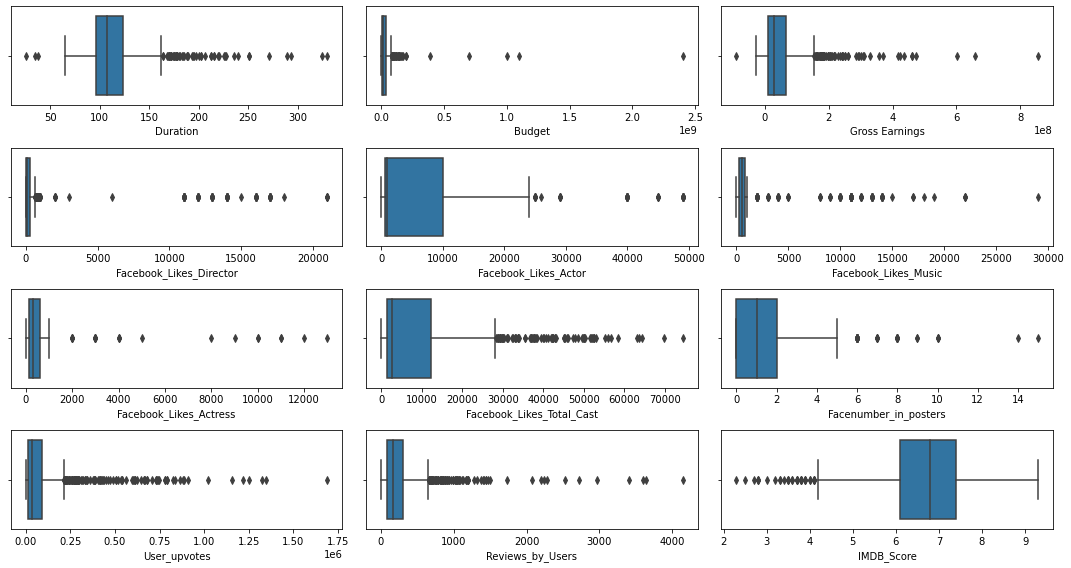

In [9]:
# use 'figsize' to fix the size
# use 'nrows' to fix number of rows
# use 'ncols' to fix number of columns
fig, ax = plt.subplots(nrows = 4, ncols = 3, figsize=(15, 8))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df_movie_num.columns, ax.flatten()):  
    
    # use boxplot() to plot the graph
    # pass the variables in the data
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(df_movie_num[variable], ax = subplot)

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

**Interpretation:** From the boxplots above we can see that there are outliers in the data. We need to remove these outliers before further analysis.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Remove the outliers using 1.5IQR. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
# calculate the first quartile
Q1 = df_movie_num.quantile(0.25)

# calculate the third quartile
Q3 = df_movie_num.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
df_movie_num = df_movie_num[~((df_movie_num < (Q1 - 1.5 * IQR)) | (df_movie_num > (Q3 + 1.5 * IQR))).any(axis=1)]

# check the shape of the data 
df_movie_num.shape

(816, 12)

**Interpretation:**  From the dimension of the data, we can see that there are 816 observations and 12 variables in the data. Thus, we have removed the outliers.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Transform the variables in the standard form such that they will have mean 0 and standard deviation 1 and get the summary.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
# instantiate the 'StandardScaler'
scaler = StandardScaler()

# fit_transform() transforms the data by first computing the mean and sd and later scaling the data
# name the standardized data as 'features_scaled'
features_scaled = scaler.fit_transform(df_movie_num)
features_scaled

array([[ 0.98167482, -0.96169127, -0.89868158, ..., -0.64875997,
        -0.54660839,  1.69768664],
       [ 0.20834893, -0.97670514, -0.87835168, ..., -0.91316241,
        -1.22570299, -1.99432582],
       [ 2.64729982, -0.96909074, -0.87835168, ..., -0.79360995,
        -0.88225285,  2.04381281],
       ...,
       [-0.26754393, -0.96557236, -0.928271  , ..., -0.84092252,
        -0.66369367,  0.19780658],
       [ 0.26783553, -0.95569989, -0.93686285, ..., -0.82742227,
        -0.55441408,  0.89005892],
       [-0.0295975 , -0.1417463 ,  0.57046118, ..., -0.04176719,
         0.85060921, -0.14831959]])

In [12]:
# convert the array back to a dataframe
# pass the required column names to the parameter 'columns'
summary = pd.DataFrame(features_scaled, columns = df_movie_num.columns)

# check the statistical summary 
summary.describe()

Duration  Budget  Gross Earnings  Facebook_Likes_Director  \
count    816.00  816.00          816.00                   816.00   
mean      -0.00   -0.00           -0.00                    -0.00   
std        1.00    1.00            1.00                     1.00   
min       -2.47   -0.98           -1.78                    -0.72   
25%       -0.74   -0.80           -0.80                    -0.68   
50%       -0.21   -0.38           -0.34                    -0.46   
75%        0.62    0.49            0.50                     0.30   
max        3.30    3.22            3.50                     3.77   

       Facebook_Likes_Actor  Facebook_Likes_Music  Facebook_Likes_Actress  \
count                816.00                816.00                  816.00   
mean                  -0.00                  0.00                   -0.00   
std                    1.00                  1.00                    1.00   
min                   -0.60                 -1.64                   -1.29   
25%                   -0.48                 -0.85                   -0.86   
50%                   -0.43                 -0.05                   -0.23   
75%                   -0.39                  0.85                    0.74   
max                    4.25                  1.71                    2.68   

       Facebook_Likes_Total_Cast  Facenumber_in_posters  User_upvotes  \
count                     816.00                 816.00        816.00   
mean                        0.00                   0.00          0.00   
std                         1.00                   1.00          1.00   
min                        -0.81                  -0.86         -0.91   
25%                        -0.58                  -0.86         -0.75   
50%                        -0.39                   0.01         -0.39   
75%                        -0.03                   0.87          0.46   
max                         3.91                   3.47          4.10   

       Reviews_by_Users  IMDB_Score  
count            816.00      816.00  
mean               0.00        0.00  
std                1.00        1.00  
min               -1.23       -2.69  
25%               -0.76       -0.61  
50%               -0.29        0.08  
75%                0.54        0.77  
max                3.79        2.39

**Interpretation:** Here all the variables have a mean 0 and standard deviation of 1. Now they are in the standard form. 

Now the data is ready for principal component analysis.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Obtain a covariance matrix and find the eigenvalues. Hence arrange the eigenvalues in decreasing order. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
# np.cov() returns covariance matrix row vise
# take transpose of standardized dataframe
trans_features_scaled = np.transpose(features_scaled)

# to get covariance matrix
cov_matrix = np.cov(trans_features_scaled)

# print the matrix
cov_matrix

array([[ 1.00122699,  0.23212022,  0.11293518,  0.17243579,  0.15257657,
         0.0708679 ,  0.04907752,  0.15295669,  0.02679595,  0.13314716,
         0.13173008,  0.27252797],
       [ 0.23212022,  1.00122699,  0.27363375,  0.15334358,  0.22934785,
         0.2716813 ,  0.24451357,  0.26400159,  0.03755116,  0.23404983,
         0.1378179 , -0.22920726],
       [ 0.11293518,  0.27363375,  1.00122699,  0.1199378 ,  0.0654592 ,
         0.14307292,  0.1385004 ,  0.09386991, -0.02329767,  0.45833533,
         0.22540712,  0.05217967],
       [ 0.17243579,  0.15334358,  0.1199378 ,  1.00122699,  0.05246468,
         0.06644522,  0.04390895,  0.05918187,  0.05888775,  0.19789613,
         0.12708188,  0.15713751],
       [ 0.15257657,  0.22934785,  0.0654592 ,  0.05246468,  1.00122699,
         0.37429659,  0.29799103,  0.98329299,  0.101542  ,  0.17417609,
         0.12099606,  0.04212114],
       [ 0.0708679 ,  0.2716813 ,  0.14307292,  0.06644522,  0.37429659,
         1.00122699,  

In [14]:
# to get shape of covariance matrix
cov_matrix.shape

(12, 12)

**Interpretation:** The above output returns the covariance matrix which is a symmetric matrix of dimension 12*12. The diagonal entries represent the variance of each variable (which is always equal to 1, as we are using the standardized data) and the off-diagonal entries represent the covariances between the variables.

In [15]:
# to get eigenvalues
# the 'eig()' returns the eigenvalues and eigenvectors of the given matrix
eig_values, eig_vectors = lin.eig(cov_matrix)

# print the eigenvalues
eig_values

array([3.28223121e+00, 2.00114967e+00, 2.97351391e-03, 1.70656062e-01,
       2.11353852e-01, 4.30562273e-01, 1.30056755e+00, 1.14135852e+00,
       7.05593722e-01, 8.21407447e-01, 9.15881664e-01, 1.03098845e+00])

**Interpretation:** The above array returns the 12 eigenvalues of the covariance matrix.

Now arrange thse values in descending order.

In [16]:
# use 'tolist()' to convert array to list
eig_values = eig_values.tolist()

# to arrange the eigenvalues in descending order
# 'sort(reverse = True)' will sort the eigenvalues in descending order
eig_values_sorted = sorted(eig_values ,reverse = True)  

# print the eigenvalues
eig_values_sorted

[3.2822312065140125,
 2.001149668241441,
 1.3005675546221707,
 1.1413585166858677,
 1.0309884462442032,
 0.9158816638591913,
 0.8214074471312937,
 0.7055937222739884,
 0.43056227311273176,
 0.21135385172389973,
 0.17065606206378084,
 0.0029735139077817457]

**Interpretation:** The above list represents the eigenvalues in decreasing order. The highest eigenvalue is 3.2822 and the lowest value is 0.0029.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Draw the scree plot and obtain the optimal number of components. Hence find the percentage of variation explained by the optimal number of components. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

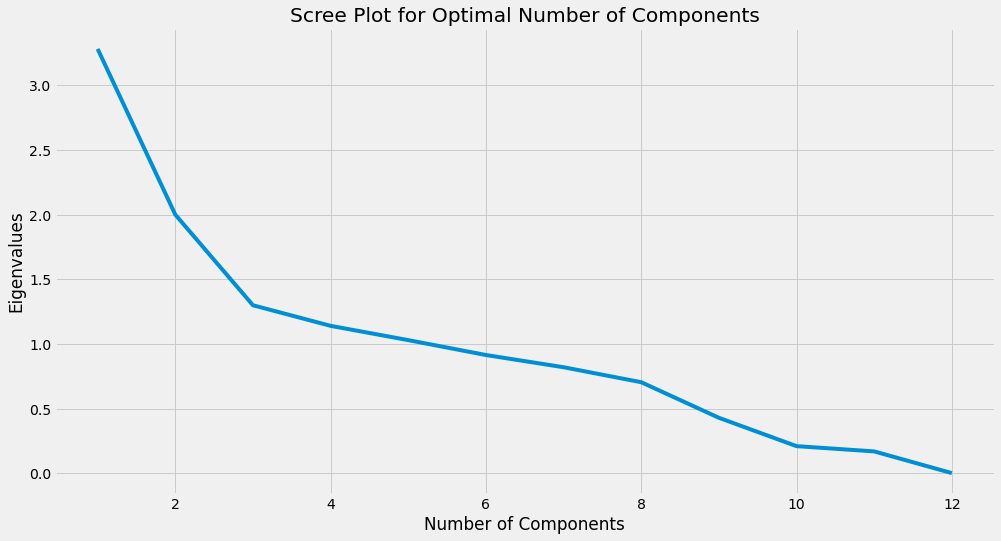

In [17]:
# visualize the elbow plot to get the optimal value of number of components
# pass the required style for the plot
plt.style.use("fivethirtyeight")

# set the figure size using 'figsize'
plt.figure(figsize=(15,8))

# pass the values 1,2,...,12 to represent the ith component on X-axis
# pass the sorted eigenvalues on the y-axis
plt.plot(range(1,13), eig_values_sorted)

# set the axes and plot labels
plt.xlabel("Number of Components")
plt.title('Scree Plot for Optimal Number of Components')
plt.ylabel("Eigenvalues")

# display the plot
plt.show()

**Interpretation:** From the above scree plot, we can see an elbow point is for `number of components = 3`. Note that, after the elbow point, the principal components do not contribute much to the variance in the data. 

Find the percentage of variation explained by the first three components.

In [18]:
# percentage of variation explained by 1st component 
p1 = eig_values_sorted[0] / sum(eig_values_sorted)
print('Percentage of variation explained by 1st component', p1)

# percentage of variation explained by 2nd component 
p2 = eig_values_sorted[1] / sum(eig_values_sorted)
print('Percentage of variation explained by 2nd component', p2)

# percentage of variation explained by 3rd component 
p3 = eig_values_sorted[2] / sum(eig_values_sorted)
print('Percentage of variation explained by 3rd component', p3)

# percentage of variation explained by the first three components 
print('percentage of variation explained by the first three components', p1+p2+p3)

Percentage of variation explained by 1st component 0.27318407202909734
Percentage of variation explained by 2nd component 0.16655810657851053
Percentage of variation explained by 3rd component 0.108247810152887
percentage of variation explained by the first three components 0.5479899887604949


**Interpretation:** Here the 1st 3 principal components explain approximately 55% of the variation in the data.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Perform the principal component analysis using python libraries with the optimal number of components obtained in the previous question. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
# specify the required no of components
# take 'n_components=3' based on the analysis of scree plot
# pass the 'random_state' to get the same output for multiple runs
pca = PCA(n_components = 3, random_state = 10)

# the 'fit_transform()' fits the PCA on the data transforms the data to compute the principal components 
# pass the standardized data to fit PCA
components = pca.fit_transform(features_scaled)

# create a dataframe of principal components
# pass the required column names to the parameter 'columns'
df_pca = pd.DataFrame(data = components, columns = ['principal_component 1','principal_component 2','principal_component 3'])

# head() to display top five rows of the transformed data
df_pca.head()

principal_component 1  principal_component 2  principal_component 3
0                  -2.05                   1.31                   2.07
1                  -3.01                  -1.06                   0.08
2                  -2.16                   1.48                   2.50
3                  -2.32                   0.83                   1.74
4                  -2.46                   0.68                   1.50

**Interpretation:** The above output returns the required principal components. Here the number of variables in the data is reduced from 12 to 3. 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Check the equality of the equation Ax = $\lambda$x, where A is the covariance matrix, $\lambda$ is the largest eigenvalue of A and x is the eigenvector corresponding $\lambda$.  </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In Q7, we obtained the eigenvalues and eigenvectors of the covariance matrix. To check the equality of the given equation, let us first calculate the left hand side and right hand side of the equation separately; and then equate both sides.

In [20]:
# consider the left hand side of the equation (i.e. Ax)
# since the 'eig_values[0]' is the largest eigenvalue of covariance matrix  
# eigenvector corresponding to that eigenvalue is given by 'eig_vectors[:,0]'
# the 'dot()' performs the matrix multiplication
LHS = np.dot(cov_matrix, eig_vectors[:,0])

# consider the right hand side of the equation (i.e. 𝜆x)
# 𝜆 represents the largest eigenvalue of the covariance matrix
RHS = eig_values[0]*eig_vectors[:,0]

# check the equality of LHS and RHS
print('LHS: \n', LHS)
print('--------------')
print('RHS: \n', RHS)

LHS: 
 [-0.55223706 -0.89630064 -0.710136   -0.4308137  -1.29594254 -1.31081395
 -1.2344963  -1.43826701 -0.26062365 -1.04137191 -0.88130104 -0.23550467]
--------------
RHS: 
 [-0.55223706 -0.89630064 -0.710136   -0.4308137  -1.29594254 -1.31081395
 -1.2344963  -1.43826701 -0.26062365 -1.04137191 -0.88130104 -0.23550467]


**Interpretation:** The above output shows that the equation on the left hand side (i.e. Ax) and the equation on the right hand side (i.e. 𝜆x) has same elements in the array. Thus, we can say that `Ax = 𝜆x` where A is the covariance matrix, 𝜆  is the largest eigenvalue of A and x is the eigenvector corresponding to 𝜆.